## 1.1. Định nghĩa model Long short-term memory
**Long short-term memory** là một dạng mô hình Recurrent neural network (RNN) mà mạng network của nó được tổng hợp từ nhiều các đơn vị *Long short-term memory*. Các đơn vị *LSTM* đều có điểm chung đó là được cấu tạo từ *một cell, một input gate, một output gate và một forget gate*. Cell sẽ có tác dụng ghi nhớ giá trị tùy ý của một khoảng thời gian bất kì và 3 cổng sẽ điều chỉnh giá trị của luồng thông tin vào và ra của cell. 
Bên dưới là sơ đồ của một đơn vị *Long short-term memory*:

![LSTM](LSTM.png)

Mạng LSTM rất phù hợp với các bài toán phân loại và dự báo dựa trên dữ liệu dạng chuỗi thời gian bởi vì model có khả năng ghi nhớ tức thời các sự kiện xảy ra ở gần nó. LSTM được thiết kế để giải quyết sự bùng nổ và triệt tiêu gradient, hiện tượng mà khiến cho các mô hình truyền thống của RNNs có thể gặp phải. Sự mở rộng của gap độ dài là một tiến bộ của model LSTM so với RNN, [model ẩn Markov](https://en.wikipedia.org/wiki/Hidden_Markov_models), và các phương pháp học chuỗi khác.

### 1.1.1. Lịch sử hình thành
*LSTM* đã được giới thiệu lần đầu tiền vào năm 1997 bởi `Sepp Hochreiter` (lĩnh vực y sinh và học máy) và `Jurgen Schmidhuber` (lĩnh vực trí tuệ nhân tạo), sau đó công trình đã được phát triển bởi nhóm của giáo sư `Felix Gers` vào năm 2000 bằng việc đưa thêm `forget gate` vào mạng *LSTM* vào cấu trúc ban đầu.

*LSTM* đã đạt được hiệu quả cao trong các mô hình xử lý ngôn ngữ tự nhiên, nhận diện chữ viết tay và dành chiến thắng trong cuộc thi `ICDAR` được tổ chức vào năm 2009. *LSTM* cũng là một trong những thành phần chính của mạng đạt được 17.7% phoneme error rate (một chỉ số được dùng để đo mức độ sai khác giữa các âm) trên bộ dữ liệu âm thanh [TIMIT](https://en.wikipedia.org/wiki/TIMIT).

Các hãng công nghệ lớn như *Google,  Facebook, Apple, Microsoft* đều sử dụng *LSTM* như một nên tảng trong các ứng dụng nhận diện giọng nói của mình. 

### 1.1.2. Cấu trúc model

Có một vài các cấu trúc khác nhau của một đơn vị *LSTM*. Nhưng cấu trúc chung đều được tổng hợp từ *một memory cell, một input gate, một output gate và một forget gate*.

Một *LSTM cell* sẽ nhậm một đầu vào và lưu nó trong một số giai đoạn. Nó tương đương với việc áp dụng hàm `f(x) = x` cho giá trị đầu vào. Chúng ta gọi hàm này là hàm xác định do có giá trị hàm bằng giá trị của biến. Bởi vì đạo hàm của hàm xác định là một hằng số nên khi thực hiện quá trình lan truyền ngược để training mô hình thì gradient sẽ không bị triệt tiêu.
Hàm kích hoạt của các cổng LSTM thường là `logistic function`. `input gate` sẽ kiểm soát sự mở rộng để giá trị mới được đưa vào một `cell`. `forget gate` sẽ kiểm soát sự mở rộng của các giá trị tồn tại trong một `cell` và `output gate` sẽ kiểm soát sự mở rộng các giá trị trong một `cell` được sử dụng để tính toán hàm activation của một đơn vị `LSTM`.

Có những kết nối vào và ra trong các cổng `LSTM` và một số trong các kết nối này tái tục. Trọng số của những kết nối này sẽ được học trong suốt quá trình training để xác định các cổng được thực hiện như thế nào.

### 1.1.3. Các biến số

Trong các hệ phương trình được trình bày bên dưới thì $W_q$ và $U_q$ chứa lần lượt các trọng số của đầu vào và các kết nối luân hồi (*recurrent connections*). Ở đây $q$ có thể là `input gate` $i$, `output gate` $o$, `foreget gate` $f$, hoặc `memory cell` dựa trên hàm kích hoạt được sử dụng là gì.

**LSTM với một forget gate**

Dạng ngắn gọn của phương trình cho quá trình truyền tiến bước của một đơn vị *LSTM* với một `forget gate` là

$\begin{eqnarray}f_t & = & \sigma_g(W_fx_t+U_fh_{t-1}+b_f) \\
i_t & = & \sigma_g(W_ix_t+U_ih_{t-1}+b_i) \\
o_t & = & \sigma_g(W_ox_t+U_oh_{t-1}+b_o) \\
c_t & = & f_t \otimes c_{t-1}+i_t \otimes \sigma_c(W_cx_t+U_ch_{t-1}+b_c) \\
h_t & = & o_t \otimes \sigma_h(c_t) \\
\end{eqnarray}$

Với các giá trị khởi tạo lần là $c_0 = 0, h_0 = 0$. Toán tử $\otimes$ là kí hiệu của tích `Hadamard product` (hay còn gọi là `element wise - product`). Tích này sẽ áp dụng trên 2 ma trận cùng kích thước và kết quả thu được là một ma trận mới có kích thước bằng với 2 ma trận số nhân sao cho phần tử bất kì của ma trận kết quả bằng tích của 2 phần tử có vị trí tương ứng ở 2 ma trận số nhân.

**Các biến**

* $x_t \in \mathbb{R}^d$: vector đầu vào của một đơn vị `LSTM`
* $f_t \in \mathbb{R}^h$: vector kích hoạt của `forget gate`
* $i_t \in \mathbb{R}^h$: vector kích hoạt của `input gate`
* $o_t \in \mathbb{R}^h$: vector kích hoạt của `output gate`
* $h_t \in \mathbb{R}^h$: vector của một đơn vị `LSTM`
* $c_t \in \mathbb{R}^h$: vector trạng thái của `cell`
* $W \in \mathbb{R}^{h \times d}, U \in \mathbb{R}^{h \times h}, b \in \mathbb{R}^{h}$: các ma trận hệ số và vector chệch cần được học trong quá trình training. Kích thước $d, h$ lần lượt là số lượng các đặc trưng và các lớp ẩn.

**Các hàm**

* $\sigma_g$: Hàm sigmoid.
* $\sigma_c$: Hàm [hyperbolic tangent](https://en.wikipedia.org/wiki/Hyperbolic_function) (có dạng hàm `tanh`).
* $\sigma_h$: Có thể là một trong hai hàm dạng hyperbolic tangent hoặc hàm xác định ($f(x) = x$)

## 1.2. Thực hành dự báo với Long short-term memory

### 1.2.1. Mục tiêu của model

*Long short-term memory* là một trong những model khá chuẩn xác trong dự báo chuỗi thời gian. Trong ví dụ này chúng ta sẽ được hướng dẫn về:

* Làm thế nào để phát triển một tợp hợp các đánh giá chung cho model `long short-term memory`
* Chuẩn bị dữ liệu đầu vào
* Xây dựng mạng neuron để training model
* Xác định hàm mất mát và thuật toán cập nhật dữ liệu
* Fitting mô hình và đánh giá kết quả dự báo

### 1.2.2. Các package cần thiết
Python 2 hoặc 3, cần cài đặt SciPy, Keras, scikit-learn, Pandas, Numpy, Matplotlib.

### 1.2.3. Bộ dữ liệu
Shampoo Sales dataset. Đây là bộ dữ liệu về doanh số bán dầu gội đầu theo từng tháng trong vòng 3 năm (36 quan sát).

In [1]:
# load and plot dataset
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# convert date time
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

# series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', index_col = 0, 
#                      date_parser = parser, parse_dates=[0])

# series.to_csv('shampoo.csv', sep = '\t', encoding = 'utf-8')
series = pd.read_csv('shampoo.csv', sep = '\t', index_col = 0)
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


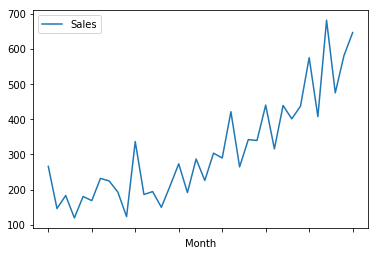

In [2]:
series.plot()

### 1.2.4. Chuẩn bị dữ liệu
Chúng ta có thể thấy dữ liệu về doanh số bán dầu gội có trend tăng dần và có yếu tố mùa vụ. Với các đặc điểm dữ liệu như vậy, việc áp dụng model LSTM là phù hợp. Quá trình xây dựng một mạng neuron sẽ cơ bản đi qua các bước sau:

1. Scale và reshape lại dữ liệu đầu vào để phù hợp với model LSTM.
2. Chia mẫu dữ liệu thành tập train và test, tập train là số liệu của 2 năm đầu tiên và test là 1 năm cuối cùng.
3. Xác định thuật toán tối ưu gradient descent và hàm mất mát.
4. Fit model trên tập train.
5. Đánh giá kết quả của mô hình trên tập test.

Bên dưới chúng ta sẽ scale và reshape lại dữ liệu đầu vào.

In [3]:
# split data into train and test
data = series.values
train, test = data[:24], data[24:]

Chúng ta sẽ biểu diễn giá trị trễ 1 tháng của tập test với giá trị thực tế của test để xem mối liên hệ giữa dữ liệu thực tế và dữ liệu trễ.

RMSE: 136.761


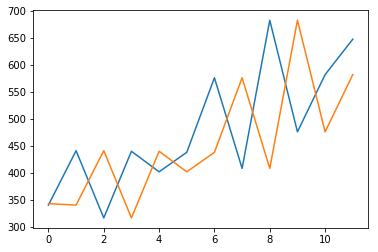

In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np

lag = np.concatenate((train[[-1]], test[:-1]), axis = 0)
# report performance
rmse = np.sqrt(mean_squared_error(test, lag))
print('RMSE: %.3f' %rmse)
# line plot of observed vs predicted
plt.plot(test)
plt.plot(lag)

Ta có thể nhìn thấy một qui luật đúng trong hầu hết các trường hợp đó là nếu tháng hiện tại doanh số tăng thì trễ 1 tháng của doanh số sẽ giảm và ngược lại. Qui luật này cho thấy sự tương quan ngược chiều trong qui luật tăng giảm của doanh số hiện tại và trễ 1 tháng của nó. Nếu qui luật này thể hiện càng rõ ràng thì model `LSTM` càng có khả năng đưa ra kết quả dự báo chuẩn xác. 

Trong dữ liệu chuỗi thời gian, giá trị hiện tại thường chịu ảnh hưởng bởi các giá trị quá khứ. Do đó các mô hình hồi qui chuỗi thời gian thường có biến dự báo là các giá trị trễ của chính chuỗi đó. Từ chuỗi ban đầu ta cần tạo ra một dataframe chứa giá trị của chuỗi và các giá trị trễ để làm dữ liệu xây dựng model hồi qui. Để thu được các chuỗi trễ của một dataframe ta sử dụng hàm `shift()`. Sau khi có được các chuỗi trễ ta merge các giá trị này theo cột bằng hàm `concat()` với tham số khai báo `axis = 1`. Bên dưới là hàm `timeseries_to_supervised()` được xây dựng để chuyển dữ liệu chuỗi sang dữ liệu bảng. Hàm số này lấy đầu vào là chuỗi data gốc và mức độ của trễ, kết quả đầu ra là một bảng gồm giá trị trễ liên tiếp từ 0 cho đến độ trễ được khai báo trong tham số `lag`. 

In [5]:
# tạo hàm chứa giá trị chuỗi và trễ
def timeseries_to_supervised(data, lag = 1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(0, lag+1)]
    colnames = ['X'+str(i) for i in range(0, lag+1)]
    df = pd.concat(columns, axis = 1)
    df.columns = colnames
    df.fillna(0, inplace = True)
    return df

Sau khi có được dataset của dữ liệu trễ. Chúng ta cần chuyển dữ liệu chuỗi thời gian sang chuỗi sai phân. Mục đích của việc lấy sai phân là để tạo ra các chuỗi dừng sau khi loại bỏ ảnh hưởng của yếu tố thời gian tác động lên chuỗi. Hầu hết các chuỗi thời gian đều chịu sự tác động của yếu tố thời gian làm chuỗi trở nên khó dự báo hơn. Sau khi loại bỏ được yếu tố thời gian, các nhân tố thực sự có ý nghĩa khác tác động lên chuỗi gồm `chu kì, mùa vụ, tính nhân tính, cộng tính,...` sẽ được quan sát và đánh giá chính xác hơn. 

Trong các dataframe của pandas có hàm `diff()` để lấy sai phân. Chúng ta cần tính toán sai phân bậc bao nhiêu thì truyền tham số vào `diff()`. Mặc định bậc sai phân của `diff()` là 1.

In [7]:
def difference(dataset, interval = 1):
    return dataset.diff(interval).iloc[1:,:]

Áp dụng các hàm số trên để khởi tạo dataframe chứa các chuỗi sai phân bậc 1 (`diff_1`) và trễ bậc 1 của sai phân bậc 1 (`lag_diff_1`) của chuỗi doanh số:

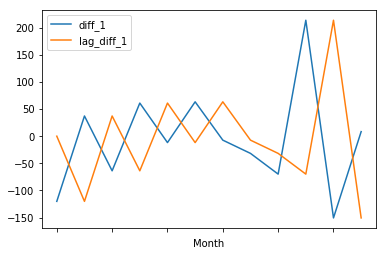

In [8]:
# data = timeseries_to_supervised(series)
diff = difference(series, interval = 1)
data = timeseries_to_supervised(diff)
data.columns = ['diff_1', 'lag_diff_1']
data.iloc[:12, :].plot()

Ta nhận thấy qui luật của chuỗi `diff_1` và `lag_diff_1` cũng tương tự như chuỗi doanh số đó là chúng tăng giảm ngược chiều nhau. Tuy nhiên một điểm lợi thế khiến chuỗi `diff_1` dễ dự báo hơn đó là nó không có trend tăng như chuỗi doanh số. Điều này giúp cho model của chúng ta bớt phức tạp hơn khi loại bỏ được nhân tố thời gian tác động tới doanh số. Do đó thay vì xây dựng mô hình dựa trên chuỗi doanh số chúng ta sẽ dựa trên chuỗi sai phân bậc 1 của nó. 

Như các mạng neural network thông thường khác, mạng LSTM cũng cần dữ liệu nằm trong miền giá trị của activation function để có thể kích hoạt network. Hàm activation function mặc định của LSTM là hàm `tanh` có miền giá trị trong khoảng (-1, 1) và miền này phải tương ứng với miền giá trị của chuỗi timeseries đầu vào. Do đó chúng ta bắt buộc phải rescale chuỗi thời gian để miền giá trị của nó nằm trong khoảng (-1, 1). Có nhiều cách scale khác nhau như `Min-Max, Max Absolute, Standard Deviation, Norm chuẩn, Quantile,...` nhưng với mô hình LSTMs chúng ta nên sử dụng scale theo `Min-Max` để đảm bảo miền giá trị nằm trong khoảng (-1, 1). Cụ thể về các cách rescale biến chúng ta có thể tham khảo ở link [feature scaling](http://scikit-learn.org/stable/modules/preprocessing.html).

In [9]:
from sklearn.preprocessing import MinMaxScaler
data = data.values
scaler = MinMaxScaler(feature_range = (-1, 1))
fit = scaler.fit(data)
data_scale = fit.transform(data)
data_scale[:5]

array([[-0.63999169, -0.14071919],
       [ 0.01392642, -0.63999169],
       [-0.40594471,  0.01392642],
       [ 0.11286635, -0.40594471],
       [-0.18977344,  0.11286635]])

Ta có thể thấy giá trị sau scale của chuỗi X đã nằm trong khoảng [-1, 1]. Trường hợp bằng 1 hoặc -1 xảy ra khi x lần lượt là các giá trị dương vô cùng hoặc âm vô cùng. Để quay trở lại giá trị gốc ta sử dụng hàm `inverse_transform()` của đối tượng `fit` mà chúng ta vừa khởi tạo.

In [27]:
data[:2]

array([[-120.1,    0. ],
       [  37.2, -120.1]])

In [28]:
fit.inverse_transform(data_scale[:2])

array([[-120.1,    0. ],
       [  37.2, -120.1]])

### 1.2.5. Xây dựng mạng LSTM  

LSTM là một dạng của mạng `Recurrent Neural Network` (RNN). Mạng này có ưu điểm là có thể học và ghi nhớ được các giá trị trong một chuỗi số dài mà không cần phải trượt qua các cửa sổ của các trễ (*window lagged*). Chính vì thế nó cực kì phù hợp với hồi qui chuỗi thời gian.

Trong keras để khởi tạo một LSTM layer chúng ta cần phải khai báo tham số `stateful` là `True`. Một LSTM layer trong Keras sẽ lưu giữ trạng thái của dữ liệu trong một batch. Một batch dữ liệu là một lượng cố định các dòng của tập dữ liệu train, nó bao gồm tợp hợp các điểm dữ liệu được đưa vào mô hình để cập nhật các hệ số của mạng RNN trong thuật toán `gradient descent`. Trạng thái giữa các batch trong LSTM được xác định một cách cụ thể. Do đó khi ta khai báo `stateful` là `True` các trạng thái giữa các batch liền trước có thể được lưu lại để khởi tạo trạng thái ở các batch liền sau nó.

Đầu vào của mạng LSTM được kì vọng là một matrix với 3 thành phần `[sample, time steps, featues]` trong đó:

* Samples: Số lượng các quan sát trong một batch.
* Time steps: Số lượng bước thời gian được sử dụng để xác định thời điểm của dữ liệu.
* Features: Số lượng các features dùng để dự báo dữ liệu tại thời điểm của dữ liệu.

Ngoài ra còn có nhiều cách khác để xác định hình dạng dữ liệu làm đầu vào cho mạng LSTM. Tuy nhiên chúng ta sẽ lựa chọn hình dạng đơn giản nhất là theo `[sample, time steps, featues]` như trên. Ta reshape lại các matrix để thu được hình dạng dữ liệu như trên.

Về cách khai báo hình dạng dữ liệu đầu vào cho một mạng `LSTM` trong `keras` chúng ta có thể tham khảo [khai báo hình dạng dữ liệu LSTM](https://keras.io/getting-started/sequential-model-guide/)

In [10]:
# Chia tập dữ liệu thành train và test
train, test = data[0:-12], data[-12:]

In [11]:
# Scale dữ liệu
scaler = MinMaxScaler(feature_range = [-1, 1])
scaler = scaler.fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)
train_scaled[:5]

array([[-0.80037766, -0.15241435],
       [ 0.04828702, -0.80037766],
       [-0.496628  ,  0.04828702],
       [ 0.17669274, -0.496628  ],
       [-0.21607769,  0.17669274]])

Trong 2 cột 1 và 2 của train thì giá trị sai phân cần dự báo là cột 1 và giá trị đầu vào được sử dụng để dự báo là cột 2 do giá trị cột 2 là trễ của cột 1. Ta xác định ma trận các biến predictor và biến target như sau:

In [12]:
# Lấy các giá trị của predictor X và output y. Reshape lại X để phù hợp với batch_size_input
X_train, y_train = train_scaled[:, 1:], train_scaled[:, 0]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_train.shape

(23, 1, 1)

Hình dạng dữ liệu đầu vào sẽ được khai báo trong tham số `batch_input_shape` của hàm khởi tạo layer `LSTM` dưới dạng một tuple xác định kích thước dữ liệu trong 1 batch (*samples*), bước thời gian (*time steps*), số lượng các đặc trưng (*features*).

Kích thước của `batch_size` phải nhỏ hơn kích thước của tập train. Kích thước `batch_size` càng lớn thì khối lượng tính toán trong một lần cập nhật hệ số càng lớn. Bên cạnh `batch_size` thì số lượng `epochs` cũng ảnh hưởng tới mức độ nhanh, chậm của thuật toán. Chúng ta có thể hiểu `batch_size` là lượng quan sát được sử dụng trong 1 phiên cập nhật. `epochs` là số lượng phiên cập nhật trên toàn bộ dữ liệu. Nếu chúng ta có 1000 điểm dữ liệu và thuật toán có `batch_size = 50` thì ta sẽ có tổng cộng 20 `batch` (1000/50). Kết hợp với số lượng `epochs` = 100 thì chúng ta sẽ có 2000 phiên cập nhật. Mỗi `epoch` sẽ cập nhật qua lần lượt 20 batch. Sau khi đi qua một lượt 20 batch thì sẽ chuyển qua một `epoch` mới. Mỗi một lượt cập nhật sẽ dựa trên số lượng các điểm bằng kích thước của `batch_size`.

Bên dưới ta sẽ khởi tạo một layer LSTM.

In [13]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

# 1. Khởi tạo network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape = (batch_size, X_train.shape[1], X_train.shape[2]), stateful = True))
model.add(Dense(1, activation = 'linear'))

# 2. Xây dựng thuật toán gradient cập nhật dữ liệu 
model.compile(loss = 'mean_squared_error', optimizer ='adam')

Using TensorFlow backend.


Ở bước 1, chúng ta sẽ khởi tạo mạng neuron gồm có 4 units với các khai báo batch_input_shape và trạng thái layer. Sau khi xây dựng xong LSTM layer chúng ta sẽ cần một layer fully connected để kết nối kết quả từ layer LSTM với đầu ra thông qua hàm `Dense()`. Mạng của chúng ta sẽ có 1 đầu ra duy nhất nên hàm `Dense()` sẽ được truyền vào 1. Hàm activation được sử dụng để tính toán kết quả đầu ra là `linear`. Batch_size mà chúng ta sử dụng để cập nhật thuật toán gradient descent là 1. Lưu ý rằng batch_size này phải là một giá trị mà số lượng quan sát của input data chia hết. Ở đây chúng ta có số quan sát của input data là 23 nên batch_size có thể nhận giá trị 1 hoặc 23.

Ở bước 2, chúng ta sẽ sử dụng thuật toán `Adam` để cập nhật hàm mất mát. Để hiểu thêm về thuật toán `Adam` chúng ta có thể đọc bài viết về [các thuật toán gradient descent](https://medium.com/explorations-in-language-and-learning/a-short-note-on-gradient-descent-optimization-algorithms-335546c5a896). Kiểu hàm mất mát được sử dụng trong mạng neuron này là `mean_squared_error`. Đây là hàm mất mát thường được sử dụng trong các trường hợp dự báo dạng hồi qui tuyến tính.

Theo như mặc định thì các mẫu trong mỗi batch sẽ được sáo trộn trước khi cập nhật hệ số của network. Tuy nhiên do bài toán hồi qui chuỗi thời gian sẽ đòi hỏi giữ được thứ tự của chuỗi để đánh giá mô hình. Do đó chúng ta cần vô hiệu hóa xáo trộn mẫu bằng cách khai báo tham số `shuffle` là `False`. Sau khi đã xác định mạng neuron và thuật toán dùng để cập nhật hệ số chúng ta sẽ tiến hành fiting model như sau:

In [14]:
# 3. Fitting model
# for i in range(100):
n_epochs = 3000
for i in range(n_epochs):
    model.fit(X_train, y_train, epochs = 1, batch_size = batch_size, verbose = 0, shuffle = False)
    model.reset_states()

Chúng ta sử dụng tổng cộng 3000 epochs để cập nhật hệ số. Mỗi một epoch gồm 23 lượt cập nhật tương ứng với gradient descent tại 23 điểm dữ liệu. Sau mỗi một epoch các trạng thái sẽ được khởi động lại để được train ở các epoch tiếp theo bằng hàm `reset_states()`. Để ẩn log của quá trình chạy model chúng ta lựa chọn `verbose = 0`. Tiếp theo chúng ta sẽ sử dụng model vừa train để dự báo trên chính tập train.

In [15]:
model.predict(X_train, batch_size = 1) 

array([[-8.0383706e-01],
       [ 5.3662956e-02],
       [-4.9383235e-01],
       [ 1.3046634e-01],
       [-2.6392266e-01],
       [ 1.4124364e-02],
       [-2.9749063e-01],
       [ 9.1373920e-04],
       [ 2.9115468e-01],
       [ 5.7051545e-01],
       [-1.0068705e+00],
       [ 3.3733845e-03],
       [ 4.6283007e-03],
       [ 2.8456557e-01],
       [-1.6513947e-01],
       [-4.6883857e-01],
       [ 3.4487134e-01],
       [-4.1538069e-01],
       [ 2.0109540e-01],
       [-3.1994557e-01],
       [ 2.8322935e-03],
       [-9.0770984e-01],
       [ 2.2145259e-01]], dtype=float32)

Dự báo tiếp tục trên tập test để kiểm tra mức độ dự báo chính xác của model.

In [16]:
predictions = list()
diff_scale = list()
diff_pred = list()
for i in range(len(test_scaled)):
    X_test, y_test = test_scaled[i, 1:], test_scaled[i, 0]
    X_test = X_test.reshape(1, 1, 1)
    yhat = model.predict(X_test, batch_size = 1)
    diff_scale.append(yhat)
    input_transform = np.array((yhat, X_test)).reshape(1, test_scaled.shape[1])
    #invert scaling
    yhat = scaler.inverse_transform(input_transform)[0][0]
    diff_pred.append(yhat)
    #invert differencing
    month_to_end = len(test_scaled)-i
    yhat = series['Sales'][-(month_to_end+1)] + yhat
    predictions.append(yhat)
    month = series.index[-month_to_end]
    actual = series['Sales'][-month_to_end] 
    print("Month %s; Forecast Values: %.2f; Actual Values: %.2f"% (month, yhat, actual))

Month 1903-01-01; Forecast Values: 275.92; Actual Values: 339.70
Month 1903-02-01; Forecast Values: 336.12; Actual Values: 440.40
Month 1903-03-01; Forecast Values: 310.87; Actual Values: 315.90
Month 1903-04-01; Forecast Values: 378.85; Actual Values: 439.30
Month 1903-05-01; Forecast Values: 301.58; Actual Values: 401.30
Month 1903-06-01; Forecast Values: 367.00; Actual Values: 437.40
Month 1903-07-01; Forecast Values: 381.62; Actual Values: 575.50
Month 1903-08-01; Forecast Values: 393.49; Actual Values: 407.60
Month 1903-09-01; Forecast Values: 424.63; Actual Values: 682.00
Month 1903-10-01; Forecast Values: 519.18; Actual Values: 475.30
Month 1903-11-01; Forecast Values: 474.24; Actual Values: 581.30
Month 1903-12-01; Forecast Values: 426.27; Actual Values: 646.90


In [17]:
from math import sqrt
rmse = sqrt(mean_squared_error(series[-12:], np.array(predictions)))
print("Mean squared error: %f"% rmse)

Mean squared error: 128.975973


([<matplotlib.axis.XTick at 0x2254898f748>,
 <a list of 11 Text xticklabel objects>)

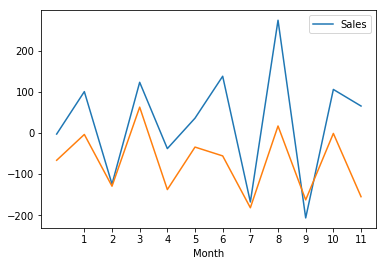

In [19]:
diff.iloc[-12:].plot()
plt.plot(diff_pred)
plt.xticks(np.arange(1, 12, 1), np.arange(1, 12, 1))

([<matplotlib.axis.XTick at 0x225489f2eb8>,
 <a list of 11 Text xticklabel objects>)

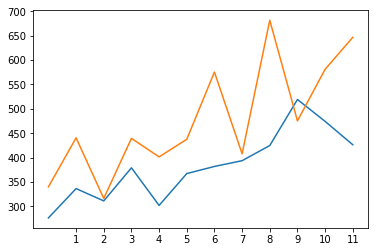

In [20]:
plt.plot(predictions)
plt.plot(series[-12:])
plt.xticks(np.arange(1, 12, 1), np.arange(1, 12, 1))

### 1.2.6. Chuẩn hóa code

Bên dưới ta sẽ viết lại các hàm bao gồm hàm xử lý dữ liệu, hàm xây dựng mạng `LSTM`, hàm đánh giá kết quả và dự báo để quá trình xây dựng mô hình trở nên gọn gàng hơn.

In [4]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np


# Tính sai phân
def difference(dataset, interval = 1):
    return dataset.diff(interval).iloc[1:, :]

# Tạo dataframe chứa giá trị hiện tại và trễ của sai phân
def timeseries_to_supervised(data, lag = 1):
    data_lag = pd.DataFrame(data)
    columns = [data_lag.shift(i) for i in range(0, lag+1)]
    colnames = ['X'+str(i) for i in range(0, lag+1)]
    data_lag = pd.concat(columns, axis = 1)
    data_lag.columns = colnames
    data_lag.fillna(0, inplace = True)
    data_lag = data_lag.iloc[1:, :]
    return data_lag

# Scale lại dữ liệu và phân chia train/test
def scale(dataset, n_obs_train):
    dataset_values = dataset.values
    scaler = MinMaxScaler(feature_range = [-1, 1])
    train = dataset_values[:-n_obs_train, :]
    test = dataset_values[-n_obs_train:, :]
    scaler = scaler.fit(train)
    # Scale train
    train = scaler.transform(train)
    # Scale test
    test = scaler.transform(test)
    return scaler, train, test

# Invert value 
def invert_scale(scaler, X, yhat):
    X = X.reshape(X.shape[0], 1)
    yhat = np.array(yhat)
    data_scale = np.concatenate(X, yhat, axis = 0)
    data_invert = scaler.invert_transform(np.array[X])
    return data_invert

# Invert difference
def invert_difference(y_act, diff, i):
    return y_act[-(i+1),:] + diff

# Khởi tạo mạng neuron và fitting model
def model_lstm(n_neurons, train, batch_size, n_epochs):
    X, y = train[:, 1:], train[:, :1]
    X = X.reshape(-1, 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(n_neurons, batch_input_shape = (batch_size, X.shape[1], X.shape[2]), stateful = True))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    for i in range(n_epochs):
        model.fit(X, y, verbose = 0, epochs = 1, batch_size = batch_size, shuffle = False)
        model.reset_states()
    return model
    

# Forecast model on test set
def forecast_lstm(model, batch_size, test, series, scaler):
    predictions = []
    for i in range(len(test)):  
        X_test, y_test = test[i,1:], test[i,0]
        X_test = X_test.reshape(1, 1, 1)
        yhat = model.predict(X_test, batch_size = 1)
        input_transform = np.array((yhat, X_test)).reshape(1, test.shape[1])
        #invert scaling
        yhat = scaler.inverse_transform(input_transform)[0][0]
        #invert differencing
        month_to_end = len(test)-i
        yhat = series['Sales'][-(month_to_end+1)] + yhat
        predictions.append(yhat)
        month = series.index[-month_to_end]
        actual = series['Sales'][-month_to_end] 
        print("Month %s; Forecast Values: %.2f; Actual Values: %.2f"% (month, yhat, actual))
    return predictions 

series = pd.read_csv('shampoo.csv', sep = '\t', index_col = 0)
diff = difference(series)
data = timeseries_to_supervised(diff)
scaler, train, test = scale(data, 12)
model = model_lstm(4, train, 1, n_epochs = 3000)
X_train = train[:, 1:]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
model.predict(X_train, batch_size = 1)
predictions = forecast_lstm(model, 1, test, series, scaler)

Month 1903-01-01; Forecast Values: 229.77; Actual Values: 339.70
Month 1903-02-01; Forecast Values: 262.62; Actual Values: 440.40
Month 1903-03-01; Forecast Values: 208.18; Actual Values: 315.90
Month 1903-04-01; Forecast Values: 241.06; Actual Values: 439.30
Month 1903-05-01; Forecast Values: 171.40; Actual Values: 401.30
Month 1903-06-01; Forecast Values: 176.34; Actual Values: 437.40
Month 1903-07-01; Forecast Values: 100.78; Actual Values: 575.50
Month 1903-08-01; Forecast Values: 263.01; Actual Values: 407.60
Month 1903-09-01; Forecast Values: 228.94; Actual Values: 682.00
Month 1903-10-01; Forecast Values: 461.92; Actual Values: 475.30
Month 1903-11-01; Forecast Values: 361.93; Actual Values: 581.30
Month 1903-12-01; Forecast Values: 285.72; Actual Values: 646.90


([<matplotlib.axis.XTick at 0x18534ee3ac8>,
 <a list of 11 Text xticklabel objects>)

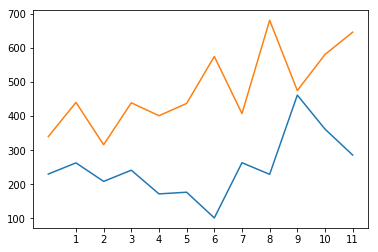

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(predictions)
plt.plot(series.iloc[-12:,:])
plt.xticks(np.arange(1, 12, 1), np.arange(1, 12, 1))

### 1.2.7. Các tài liệu tham khảo

Tài liệu tham khảo:

1. [Sơ đồ model LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

2. [Blog machinelearningmastery của Jason Brownlee](https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/)

3. [Tổng hợp các phương pháp dự báo timeseries](https://www.datascience.com/blog/time-series-forecasting-machine-learning-differences)

4. [Dự báo timeseries trafic kaggle](https://www.kaggle.com/c/web-traffic-time-series-forecasting)